# Analysis of European Soccer, 2008-2016.

<img src="./images/soccer.PNG" alt="European Soccer Players">

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#importing">Importing The Datasets</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
</ul>

<a id='intro'></a>
## Introduction 

This dataset, taken from a Kaggle dataset repository, consists of 11 european countries and their respective championships or leagues. There are 25,000 matches plus in the dataset and more than 10,000 players. But for our analysis, we will concentrate on just the three four leagues in Europe: The Premiership in England, the Bundesliga in Germany, La liga in Spain, and Series A in Italy.

<a id='importing'></a>
## Importing the dataset

The dataset is an SQLite database with 7 tables - Country, League, Match, Player, Player_Attributes, Team, and Team_Attributes. To use the data, we need to convert the tables to a pandas dataframe so we could clean it and generate insights. 

The code to convert all the tables to csv was found from a stackoverflow post. The link to the post is in the references section of this notebook. 

In [89]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


In [2]:
# # uncomment this section if this is your first time here. These codes create the csv files 

# # establish sqlite connection
# conn = sqlite3.connect('database.sqlite')
# c = conn.cursor()

# # loop through the database tables and extract them. 
# for table in c.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall():
#     t = table[0]
#     df = pd.read_sql('SELECT * from ' + t, conn)
#     df.to_csv('./data/' + t + '.csv', index=False)

The CSV files generated are large files, so I gitignored them while pushing to Github. You have to run the above python code yourself to be able to run this notebook locally. 

In [3]:
# now let's import each of the datasets to a dataframe
# the country dataset
country_df = pd.read_csv("./data_csvs/Country.csv")
country_df.head(5)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [4]:
# the league dataset
league_df = pd.read_csv("./data_csvs/League.csv")
league_df.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [5]:
# the match dataset
match_df = pd.read_csv("./data_csvs/Match.csv")
# transpose the head because of so many columns
match_df.head().T

,0,1,2,3,4
id,1,2,3,4,5
country_id,1,1,1,1,1
league_id,1,1,1,1,1
season,2008/2009,2008/2009,2008/2009,2008/2009,2008/2009
stage,1,1,1,1,1
...,...,...,...,...,...
GBD,3.25,3.25,3.2,3.75,3.5
GBA,4.0,3.75,2.5,5.5,1.65
BSH,1.73,1.91,2.3,1.44,4.75
BSD,3.4,3.25,3.2,3.75,3.3


Let's get a sense of the columns in the match dataframe by outputing them

In [6]:
match_list = match_df.columns
print(match_list[:30]) # first thirty
print(match_list[30:60]) # next thirty
print(match_list[60:95]) # next thirty five
print(match_list[95:]) # last 20

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8'],
      dtype='object')
Index(['away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4',
       'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8',
       'home_player_Y9', 'home_player_Y10', 'home_player_Y11',
       'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7', '

We'll further analyze the match dataframe soon. Let's import the rest of the datasets

In [7]:
player_attributes_df = pd.read_csv("./data_csvs/Player_Attributes.csv")
player_attributes_df.head().T

,0,1,2,3,4
id,1,2,3,4,5
player_fifa_api_id,218353,218353,218353,218353,218353
player_api_id,505942,505942,505942,505942,505942
date,2016-02-18 00:00:00,2015-11-19 00:00:00,2015-09-21 00:00:00,2015-03-20 00:00:00,2007-02-22 00:00:00
overall_rating,67.0,67.0,62.0,61.0,61.0
potential,71.0,71.0,66.0,65.0,65.0
preferred_foot,right,right,right,right,right
attacking_work_rate,medium,medium,medium,medium,medium
defensive_work_rate,medium,medium,medium,medium,medium
crossing,49.0,49.0,49.0,48.0,48.0


In [8]:
# the player dataframe
player_df = pd.read_csv("./data_csvs/Player.csv")
player_df.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [9]:
# the team attributes data set
team_attributes_df = pd.read_csv("./data_csvs/Team_Attributes.csv")
team_attributes_df.head().T

,0,1,2,3,4
id,1,2,3,4,5
team_fifa_api_id,434,434,434,77,77
team_api_id,9930,9930,9930,8485,8485
date,2010-02-22 00:00:00,2014-09-19 00:00:00,2015-09-10 00:00:00,2010-02-22 00:00:00,2011-02-22 00:00:00
buildUpPlaySpeed,60,52,47,70,47
buildUpPlaySpeedClass,Balanced,Balanced,Balanced,Fast,Balanced
buildUpPlayDribbling,NaN,48.0,41.0,NaN,NaN
buildUpPlayDribblingClass,Little,Normal,Normal,Little,Little
buildUpPlayPassing,50,56,54,70,52
buildUpPlayPassingClass,Mixed,Mixed,Mixed,Long,Mixed


In [10]:
# finally, the team data frame
team_df = pd.read_csv("./data_csvs/Team.csv")
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


To be honest, what I can analyze from the dataset is limited because I lack access to a subject matter expert for the columns in some of the dataframes. But would do my best to extract insights from the much I know about the game of soccer and how the game is organized. 

<a id='wrangling'></a>
## Data Wrangling

This section involves assessing and cleaning the data. We have 7 data frames and they need to be wrangled. 

I will start with the country data frame. 


In [11]:
# getting the dimensions of the country_df data frame
f'There are {country_df.shape[0]} samples and {country_df.shape[1]} columns'

'There are 11 samples and 2 columns'

So we have 11 countries in the data frame. We need only four: England, Germany, Spain, and Italy. 

In [12]:
# checking the data types for inconsistencies
country_df.dtypes

id       int64
name    object
dtype: object

There are no inconsistencies in the data types. 

In [13]:
# check for nulls or missing values
country_df.isnull().sum()

id      0
name    0
dtype: int64

No nulls or missing values in the country data frame. 

In [14]:
# check for duplicates
sum(country_df.duplicated())

0

There are no duplicates. 

In [15]:
# check for number of unique values in each column. 
country_df.nunique()

id      11
name    11
dtype: int64

This confirms what we already know that the country data frame contains 11 countries. 

Next is the League dataframe, league_df.

In [16]:
# check for the dimension of the league dataframe
f'There are {league_df.shape[0]} samples and {league_df.shape[1]} columns'

'There are 11 samples and 3 columns'

The 11 samples refer to the 11 countries in the data frame. We are interested in 4. 

In [17]:
# checking for data types consistency
league_df.dtypes

id             int64
country_id     int64
name          object
dtype: object

The data types are consistent with what is expected. 

In [18]:
# check for nulls
league_df.isnull().sum()

id            0
country_id    0
name          0
dtype: int64

There are no missing data in the leagues data frame. 

In [19]:
# check for duplicates
sum(league_df.duplicated())

0

There are no duplicate rows. 

In [20]:
# check for the unique values in each column
league_df.nunique()

id            11
country_id    11
name          11
dtype: int64

This confirms that in the data frame there are 11 countries and 11 leagues.

Next is the match data frame. 

In [21]:
# check for dimensions
f'There are {match_df.shape[0]} samples and {match_df.shape[1]} columns'

'There are 25979 samples and 115 columns'

For the 9 years of collected data, we can see that there are 25,979 matches data collected with 115 columns. 

In [22]:
# checking for datatype consistency
match_df.dtypes

id              int64
country_id      int64
league_id       int64
season         object
stage           int64
               ...   
GBD           float64
GBA           float64
BSH           float64
BSD           float64
BSA           float64
Length: 115, dtype: object

The data types are consistent, so we don't need to work on them. 

In [23]:
# checking for missing data and nulls
match_nulls = match_df.isnull().sum()
for index, value in match_nulls.items():
    if value > 0:
        print(index, value)

home_player_X1 1821
home_player_X2 1821
home_player_X3 1832
home_player_X4 1832
home_player_X5 1832
home_player_X6 1832
home_player_X7 1832
home_player_X8 1832
home_player_X9 1832
home_player_X10 1832
home_player_X11 1832
away_player_X1 1832
away_player_X2 1832
away_player_X3 1832
away_player_X4 1832
away_player_X5 1832
away_player_X6 1832
away_player_X7 1832
away_player_X8 1832
away_player_X9 1833
away_player_X10 1833
away_player_X11 1839
home_player_Y1 1821
home_player_Y2 1821
home_player_Y3 1832
home_player_Y4 1832
home_player_Y5 1832
home_player_Y6 1832
home_player_Y7 1832
home_player_Y8 1832
home_player_Y9 1832
home_player_Y10 1832
home_player_Y11 1832
away_player_Y1 1832
away_player_Y2 1832
away_player_Y3 1832
away_player_Y4 1832
away_player_Y5 1832
away_player_Y6 1832
away_player_Y7 1832
away_player_Y8 1832
away_player_Y9 1833
away_player_Y10 1833
away_player_Y11 1839
home_player_1 1224
home_player_2 1315
home_player_3 1281
home_player_4 1323
home_player_5 1316
home_player_6 132

The following columns of interest have missing values: goal, shoton, shotoff, foulcommit, card, cross, corner, and possession. These are values that cannot be imputed for a match so they will be left as-is. 

In [24]:
# check for duplicates
sum(match_df.duplicated())

0

There are no duplicated matches in the match data frame. 

Each match is unique so I expect a huge numer of unique values for columns. So it will not be investigated. 

In [25]:
# getting useful descriptive statistics in the match data frame
match_df.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


Just to take a few. The highest goal scored by a home team is 10 in a match and the highest by the away team is 9 in a match. The mean goals for both home and away teams are 1. 

Now, we'll consider the player_attributes dataframe. 

In [26]:
# checking the dimensions
f'There are {player_attributes_df.shape[0]} samples and {player_attributes_df.shape[1]} columns.'

'There are 183978 samples and 42 columns.'

In [27]:
# checking for data consistency
player_attributes_df.dtypes

id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision  

In [28]:
player_attributes_df['defensive_work_rate'].unique()

array(['medium', 'high', 'low', '_0', nan, '5', 'ean', 'o', '1', 'ormal',
       '7', '2', '8', '4', 'tocky', '0', '3', '6', '9', 'es'],
      dtype=object)

There are some inconsistent datatypes in the player_attributes dataframe. 
1. Date is characterized as a string. It has to be converted to a datatime datatype. 
2. Defensive_work_rate has values that are both strings and numbers. It is characterized as a string. Since there is no data dictionary to help do a mapping, I will leave it as it is.  

In [29]:
# check for nulls and missing data 
player_attributes_df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

Some players don't have attribute values assigned to them. Because attributes are player specific and can change over time, i.e dynamic, I will leave the missing attributes as they are. 

In [30]:
# check for duplicates
sum(player_attributes_df.duplicated())

0

There are no duplicates in the data frame. That's good. 

In [31]:
# check for number of unique values in each column
player_attributes_df.nunique()

id                     183978
player_fifa_api_id      11062
player_api_id           11060
date                      197
overall_rating             61
potential                  56
preferred_foot              2
attacking_work_rate         8
defensive_work_rate        19
crossing                   95
finishing                  97
heading_accuracy           96
short_passing              95
volleys                    93
dribbling                  97
curve                      92
free_kick_accuracy         97
long_passing               95
ball_control               93
acceleration               86
sprint_speed               85
agility                    81
reactions                  78
balance                    81
shot_power                 96
jumping                    79
stamina                    84
strength                   82
long_shots                 96
aggression                 91
interceptions              96
positioning                95
vision                     97
penalties 

From the unique values in each column, we can see that the data frame contains information on 11,062 players in Europe for the period under consideration. Some columns also have a great variety of unique values. 

In [32]:
# let's take descriptive statistics
player_attributes_df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


Among all other values, we see that the overall rating for players has a maximum of 94 and a minimum of 33 with a mean of 69. So many of the players are above average players. That is what we expect from the top leagues in Europe. The highest potential is 97 with a mean of 74 which also confirms our expectation. 

Now I will consider the player data frame. 


In [33]:
# checking dimensions
f'The dataframe has {player_df.shape[0]} samples and {player_df.shape[1]} columns'

'The dataframe has 11060 samples and 7 columns'

Information has been collected on 11,060 players in Europe for the period under consideration. This shows that there are two more players in the player attributes data frame (11,062) than we have in the player data frame. Maybe while compiling the data, the collectors did not insert information about two players in the player data frame. 

In [34]:
# checking for datatype consistency
player_df.dtypes

id                      int64
player_api_id           int64
player_name            object
player_fifa_api_id      int64
birthday               object
height                float64
weight                  int64
dtype: object

The only data inconsistency is in the birthday column. It was characterised as a string. We need to convert it to datetime object. 

In [35]:
# checking for nulls and missing data
player_df.isnull().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

There are no missing data in the player dataframe. 

In [36]:
# check for duplicates
sum(player_df.duplicated())

0

There are no duplicates in the data frame. 

In [37]:
# check number of unique values in each column 
player_df.nunique()

id                    11060
player_api_id         11060
player_name           10848
player_fifa_api_id    11060
birthday               5762
height                   20
weight                   50
dtype: int64

We can see that some of the birthdays of players fall on the same day. Also, many players share similar heights and weights. That shows the players must be keeping to a strict and closely watched health regime. 

In [38]:
# descriptive statistics for the columns
player_df.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


The interquartile range for weight is 20. That shows most players follow a good health regime as to maintaining a good weight. 

Next is the team attributes data frame. 

In [39]:
# check the dimensions of the data 
f'There are {team_attributes_df.shape[0]} samples and {team_attributes_df.shape[1]} columns.'

'There are 1458 samples and 25 columns.'

In [40]:
# checking datatypes consistency
team_attributes_df.dtypes

id                                  int64
team_fifa_api_id                    int64
team_api_id                         int64
date                               object
buildUpPlaySpeed                    int64
buildUpPlaySpeedClass              object
buildUpPlayDribbling              float64
buildUpPlayDribblingClass          object
buildUpPlayPassing                  int64
buildUpPlayPassingClass            object
buildUpPlayPositioningClass        object
chanceCreationPassing               int64
chanceCreationPassingClass         object
chanceCreationCrossing              int64
chanceCreationCrossingClass        object
chanceCreationShooting              int64
chanceCreationShootingClass        object
chanceCreationPositioningClass     object
defencePressure                     int64
defencePressureClass               object
defenceAggression                   int64
defenceAggressionClass             object
defenceTeamWidth                    int64
defenceTeamWidthClass             

The only inconsistent data is the date column. We need to convert it to a datetime column. 

In [41]:
# check for nulls and missing data
team_attributes_df.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

The only column with missing data is the buildUpPlayDribbling column. It will be left as is, and all the more so where there is no data dictionary to understand what the column means. 

In [42]:
# checking for duplicated rows
sum(team_attributes_df.duplicated())

0

There are no duplicate rows. 

In [43]:
# checking for unique values in each column
team_attributes_df.nunique()

id                                1458
team_fifa_api_id                   285
team_api_id                        288
date                                 6
buildUpPlaySpeed                    57
buildUpPlaySpeedClass                3
buildUpPlayDribbling                49
buildUpPlayDribblingClass            3
buildUpPlayPassing                  58
buildUpPlayPassingClass              3
buildUpPlayPositioningClass          2
chanceCreationPassing               50
chanceCreationPassingClass           3
chanceCreationCrossing              56
chanceCreationCrossingClass          3
chanceCreationShooting              57
chanceCreationShootingClass          3
chanceCreationPositioningClass       2
defencePressure                     48
defencePressureClass                 3
defenceAggression                   47
defenceAggressionClass               3
defenceTeamWidth                    43
defenceTeamWidthClass                3
defenceDefenderLineClass             2
dtype: int64

The difference in numbers between the team_fifa_api_id and team_api_id is intriguing. When investigating the team data frame below, we will get the actual figure for the number of teams in the data set. 

In [44]:
# descriptive statistics of the team attributes data frame
team_attributes_df.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


Next is the team data frame that will be investigated. 

In [45]:
# checking the dimensions
f'There are {team_df.shape[0]} samples and {team_df.shape[1]} columns'

'There are 299 samples and 5 columns'

So now we can confidently say there are 299 teams in the data set. 

In [46]:
# check datatypes consistency
team_df.dtypes

id                    int64
team_api_id           int64
team_fifa_api_id    float64
team_long_name       object
team_short_name      object
dtype: object

The data types are consistent. 

In [47]:
# check for nulls and missing data
team_df.isnull().sum()

id                   0
team_api_id          0
team_fifa_api_id    11
team_long_name       0
team_short_name      0
dtype: int64

Now we understand why the team_fifa_api_id column in the earlier dataframe, team_attributes, was different. There are some teams without the FIFA id. So, while using the dataset, we will not deal with the FIFA id but only use the team api id. 

In [48]:
# check for duplicate rows
sum(team_df.duplicated())

0

There are no duplicate rows. 

In [49]:
# check for the unique values in the data frame
team_df.nunique()

id                  299
team_api_id         299
team_fifa_api_id    285
team_long_name      296
team_short_name     259
dtype: int64

There is a possibility that in the dataframe, some team long names are repeated and some teams have similar short names. That is why these columns have lesser number of unique values than the team api id. 

### Data Cleaning

Based on the findings during the data wrangling stage, a thorough data cleaning will now be done. 

1. In player_attributes_df, we have to convert the date column from string to datetime object. 

In [50]:
# converting the date column from string to datetime object. 
player_attributes_df['date'] = pd.to_datetime(player_attributes_df['date'])

2. In player_df, the birthday column is characterized as a string. It also needs to be converted to datetime object. 

In [51]:
player_df['birthday'] = pd.to_datetime(player_df['birthday'])

3. In the team_attributes_df, the only inconsistent data is the date column. It has to be coinverted to datetime object. 

In [52]:
team_attributes_df['date'] = pd.to_datetime(team_attributes_df['date'])

## Exploratory Data Analysis 

We will explore the data using visual aids and statistics. To aid our exploration, we will concentrate our exploration on key questions we want to understand from the data. 



### Key Question 1: What teams won the most games?

We'll analyze this per country and then overall for the 9 years period. 

First, we'll need to merge the match_df with country_df tables so we can associate a country with a match. 

In [53]:
# match_df too big. Get relevant columns
match_cols = ["country_id", "league_id", "season", "stage", "date", 
"match_api_id", "home_team_api_id", "away_team_api_id", "home_team_goal", "away_team_goal"]
match_filtered = match_df[match_cols]

In [54]:
match_filtered.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [55]:
# the merge
match_country = match_filtered.merge(country_df, left_on="country_id", right_on="id")
match_country.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id,name
0,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,1,Belgium
1,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,1,Belgium
2,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,1,Belgium
3,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,1,Belgium
4,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,1,Belgium


I will start filtering for English matches. 

In [56]:
english_matches = match_country[match_country['name'] == "England"]
english_matches.head()

,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id,name
1728,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1,1729,England
1729,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,0,1729,England
1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1,1729,England
1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1,1729,England
1732,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2,1729,England


I will now pick out only the relevant columns for the analysis. Since I am taking a holistic view, the date column is not necessary. In another analysis, I might want to look at insights per year or season, but for now, I am considering the whole period. These helps see what teams have been in the top English Premiership for the 9 years since some teams can drop to the Championship. 

In [57]:
english_cols = ["home_team_api_id", "away_team_api_id", "home_team_goal", "away_team_goal", "name"]
english_matches_updated = english_matches[english_cols]
english_matches_updated

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name
1728,10260,10261,1,1,England
1729,9825,8659,1,0,England
1730,8472,8650,0,1,England
1731,8654,8528,2,1,England
1732,10252,8456,4,2,England
...,...,...,...,...,...
4763,8466,8197,2,2,England
4764,10003,10194,0,1,England
4765,8586,8650,0,0,England
4766,9817,9825,0,3,England


I will now insert the names for the home team and away team. 

In [58]:
def insert_team_name(x):
    # get the x value in team_api_id of team_df and return the row
    team_row = team_df.loc[team_df['team_api_id'] == x]
    # get the long name for that row
    long_name = team_row['team_long_name'].values
    result = "".join(long_name)
    return result

In [59]:
english_matches_updated['home_team'] = english_matches_updated['home_team_api_id'].apply(insert_team_name)

/tmp/ipykernel_342/1709332459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_matches_updated['home_team'] = english_matches_updated['home_team_api_id'].apply(insert_team_name)


In [60]:
english_matches_updated.head()

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name,home_team
1728,10260,10261,1,1,England,Manchester United
1729,9825,8659,1,0,England,Arsenal
1730,8472,8650,0,1,England,Sunderland
1731,8654,8528,2,1,England,West Ham United
1732,10252,8456,4,2,England,Aston Villa


In [61]:
english_matches_updated['away_team'] = english_matches_updated['away_team_api_id'].apply(insert_team_name)

/tmp/ipykernel_342/2221444958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_matches_updated['away_team'] = english_matches_updated['away_team_api_id'].apply(insert_team_name)


In [62]:
english_matches_updated.head()

,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name,home_team,away_team
1728,10260,10261,1,1,England,Manchester United,Newcastle United
1729,9825,8659,1,0,England,Arsenal,West Bromwich Albion
1730,8472,8650,0,1,England,Sunderland,Liverpool
1731,8654,8528,2,1,England,West Ham United,Wigan Athletic
1732,10252,8456,4,2,England,Aston Villa,Manchester City


In [63]:
english_updated_cols = ["name", "home_team", "away_team","home_team_goal", "away_team_goal"]
english_matches_filtered = english_matches_updated[english_updated_cols]

In [64]:
english_matches_filtered.head()

,name,home_team,away_team,home_team_goal,away_team_goal
1728,England,Manchester United,Newcastle United,1,1
1729,England,Arsenal,West Bromwich Albion,1,0
1730,England,Sunderland,Liverpool,0,1
1731,England,West Ham United,Wigan Athletic,2,1
1732,England,Aston Villa,Manchester City,4,2


We'll now state the outcomes for the home and away teams. 

In [65]:
def home_team_outcome(x):
    if x['home_team_goal'] > x['away_team_goal']:
        return "Win"
    elif x['home_team_goal'] == x['away_team_goal']:
        return "Draw"
    else: 
        return "Loss"         


In [66]:
english_matches_filtered['home_team_outcome'] = english_matches_filtered.apply(home_team_outcome, axis=1)

/tmp/ipykernel_342/2336430521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_matches_filtered['home_team_outcome'] = english_matches_filtered.apply(home_team_outcome, axis=1)


In [67]:
english_matches_filtered.head()

,name,home_team,away_team,home_team_goal,away_team_goal,home_team_outcome
1728,England,Manchester United,Newcastle United,1,1,Draw
1729,England,Arsenal,West Bromwich Albion,1,0,Win
1730,England,Sunderland,Liverpool,0,1,Loss
1731,England,West Ham United,Wigan Athletic,2,1,Win
1732,England,Aston Villa,Manchester City,4,2,Win


In [68]:
def away_team_outcome(x):
    if x['away_team_goal'] > x['home_team_goal']:
        return "Win"
    elif x['away_team_goal'] == x['home_team_goal']:
        return "Draw"
    else: 
        return "Loss"         


In [69]:
english_matches_filtered['away_team_outcome'] = english_matches_filtered.apply(away_team_outcome, axis=1)

In [70]:
english_matches_filtered.head()

,name,home_team,away_team,home_team_goal,away_team_goal,home_team_outcome,away_team_outcome
1728,England,Manchester United,Newcastle United,1,1,Draw,Draw
1729,England,Arsenal,West Bromwich Albion,1,0,Win,Loss
1730,England,Sunderland,Liverpool,0,1,Loss,Win
1731,England,West Ham United,Wigan Athletic,2,1,Win,Loss
1732,England,Aston Villa,Manchester City,4,2,Win,Loss


I will now explore the home teams. I will look for the home teams with the most wins, draws and losses. 

In [71]:
english_hometeam_win = english_matches_filtered[english_matches_filtered['home_team_outcome'] == "Win"]
english_hometeam_win.head()

,name,home_team,away_team,home_team_goal,away_team_goal,home_team_outcome,away_team_outcome
1729,England,Arsenal,West Bromwich Albion,1,0,Win,Loss
1731,England,West Ham United,Wigan Athletic,2,1,Win,Loss
1732,England,Aston Villa,Manchester City,4,2,Win,Loss
1734,England,Middlesbrough,Tottenham Hotspur,2,1,Win,Loss
1735,England,Bolton Wanderers,Stoke City,3,1,Win,Loss


In [72]:
# pick only home teams cols
english_homewin_cols = ["home_team", "home_team_outcome"]
english_hometeam_win_updated = english_hometeam_win[english_homewin_cols]
english_hometeam_win_updated.head()

,home_team,home_team_outcome
1729,Arsenal,Win
1731,West Ham United,Win
1732,Aston Villa,Win
1734,Middlesbrough,Win
1735,Bolton Wanderers,Win


In [73]:
# we now do groupby since some teams won at home more than once
english_hometeam_win_grouped = english_hometeam_win_updated.groupby("home_team").count()
english_hometeam_win_grouped.head()

,home_team_outcome
home_team,
Arsenal,97
Aston Villa,45
Birmingham City,14
Blackburn Rovers,29
Blackpool,5


In [74]:
# convert the series to a data frame
english_hometeam_win_grouped.reset_index(inplace=True)
# rename cols
english_hometeam_win_grouped.rename(columns={"home_team_outcome": "home_team_wins"}, inplace=True)
english_hometeam_win_grouped.head()

,home_team,home_team_wins
0,Arsenal,97
1,Aston Villa,45
2,Birmingham City,14
3,Blackburn Rovers,29
4,Blackpool,5


In [76]:
# we'll now sort the outcome
english_hometeam_win_grouped.sort_values(by="home_team_wins", ascending=False, inplace=True)
english_hometeam_win_grouped.head()

,home_team,home_team_wins
17,Manchester United,116
16,Manchester City,113
9,Chelsea,101
0,Arsenal,97
28,Tottenham Hotspur,88


We can see that Manchester United had the highest home wins for the 9 year period followed by Manchester City. These are the top teams in the English premiership. 

Let's see this information visually. 

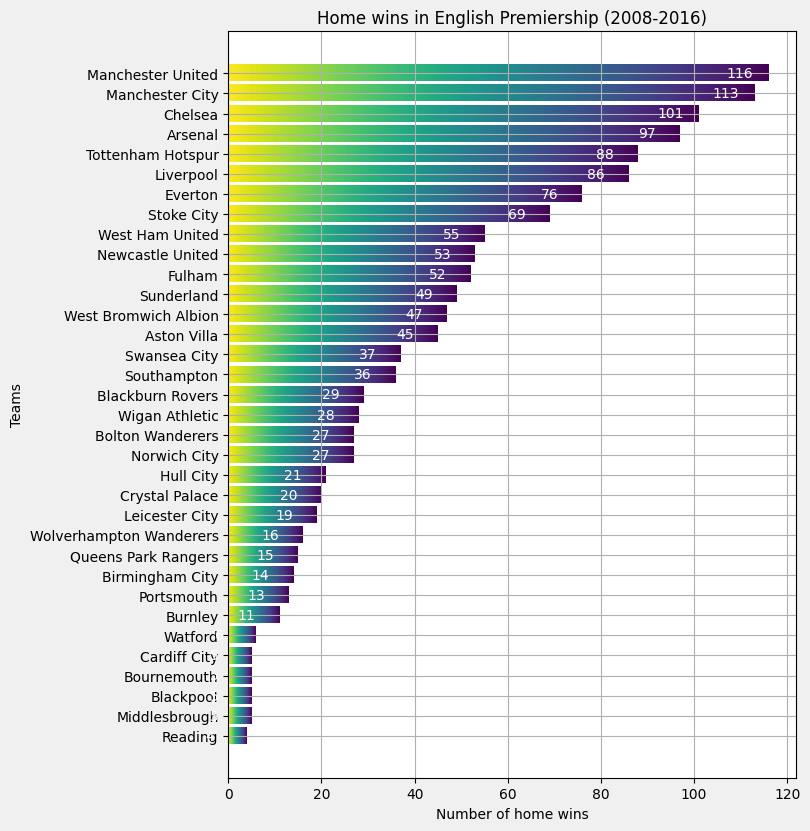

In [91]:
english_hometeam_win_grouped.sort_values(by="home_team_wins", inplace=True)
fig, ax = plt.subplots(figsize=(8,8), facecolor=(.94, .94, .94))
mpl.pyplot.viridis()
bar = ax.barh(english_hometeam_win_grouped['home_team'], english_hometeam_win_grouped['home_team_wins']);
plt.tight_layout()
plt.title("Home wins in English Premiership (2008-2016)")
plt.ylabel("Teams");
plt.xlabel("Number of home wins");

ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

            
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white')            # Change label color to white
    
    

Now, let's see the team with the highest home draws

In [92]:
english_hometeam_draw = english_matches_filtered[english_matches_filtered['home_team_outcome'] == "Draw"]
english_hometeam_draw.head()

,name,home_team,away_team,home_team_goal,away_team_goal,home_team_outcome,away_team_outcome
1728,England,Manchester United,Newcastle United,1,1,Draw,Draw
1739,England,Arsenal,Tottenham Hotspur,4,4,Draw,Draw
1751,England,Middlesbrough,West Ham United,1,1,Draw,Draw
1754,England,West Bromwich Albion,Blackburn Rovers,2,2,Draw,Draw
1767,England,Wigan Athletic,Stoke City,0,0,Draw,Draw


In [93]:
# pick only home teams cols
english_homedraw_cols = ["home_team", "home_team_outcome"]
english_hometeam_draw_updated = english_hometeam_draw[english_homedraw_cols]
english_hometeam_draw_updated.head()

,home_team,home_team_outcome
1728,Manchester United,Draw
1739,Arsenal,Draw
1751,Middlesbrough,Draw
1754,West Bromwich Albion,Draw
1767,Wigan Athletic,Draw


In [94]:
# we now do groupby since some teams drew at home more than once
english_hometeam_draw_grouped = english_hometeam_draw_updated.groupby("home_team").count()
english_hometeam_draw_grouped.head()

,home_team_outcome
home_team,
Arsenal,34
Aston Villa,50
Birmingham City,17
Blackburn Rovers,21
Blackpool,5


In [95]:
# convert the series to a data frame
english_hometeam_draw_grouped.reset_index(inplace=True)
# rename cols
english_hometeam_draw_grouped.rename(columns={"home_team_outcome": "home_team_draws"}, inplace=True)
english_hometeam_draw_grouped.head()

,home_team,home_team_draws
0,Arsenal,34
1,Aston Villa,50
2,Birmingham City,17
3,Blackburn Rovers,21
4,Blackpool,5


In [96]:
# we'll now sort the outcome
english_hometeam_draw_grouped.sort_values(by="home_team_draws", ascending=False, inplace=True)
english_hometeam_draw_grouped.head()

,home_team,home_team_draws
1,Aston Villa,50
26,Sunderland,47
11,Everton,43
25,Stoke City,43
15,Liverpool,43


We see that Aston Villa and Sunderland had the most draws during the 9 years period. 

I will now visualize this information.

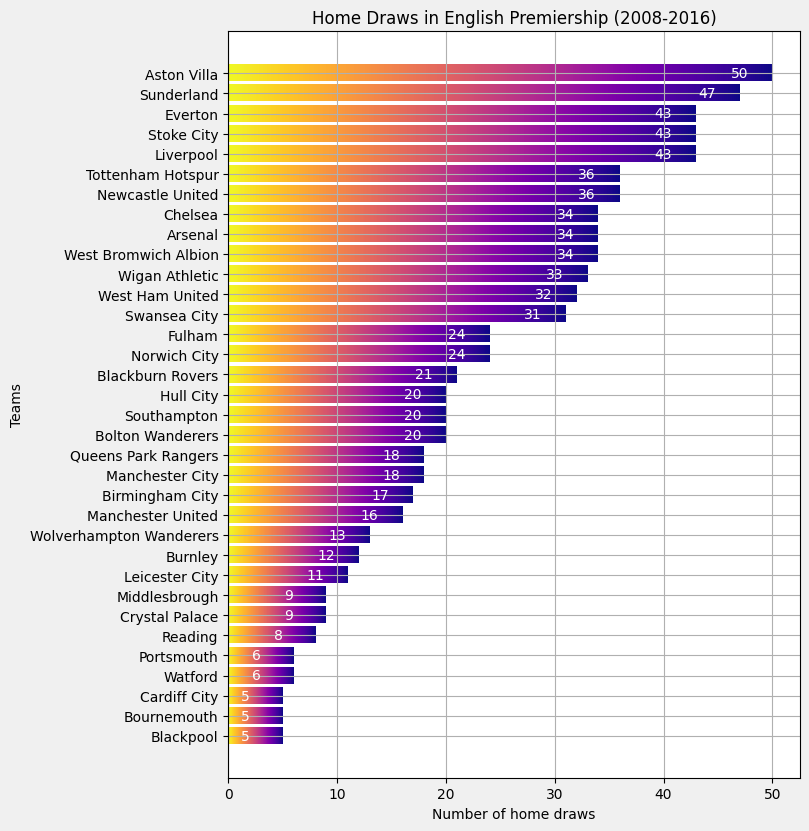

In [99]:
english_hometeam_draw_grouped.sort_values(by="home_team_draws", inplace=True)
fig, ax = plt.subplots(figsize=(8,8), facecolor=(.94, .94, .94))
mpl.pyplot.plasma()
bar = ax.barh(english_hometeam_draw_grouped['home_team'], english_hometeam_draw_grouped['home_team_draws']);
plt.tight_layout()
plt.title("Home Draws in English Premiership (2008-2016)")
plt.ylabel("Teams");
plt.xlabel("Number of home draws");

ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

            
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white')            # Change label color to white
    
    

I will now look at home losses. What team had the highest home losses?

In [100]:
english_hometeam_loss = english_matches_filtered[english_matches_filtered['home_team_outcome'] == "Loss"]
english_hometeam_loss.head()

,name,home_team,away_team,home_team_goal,away_team_goal,home_team_outcome,away_team_outcome
1730,England,Sunderland,Liverpool,0,1,Loss,Win
1733,England,Everton,Blackburn Rovers,2,3,Loss,Win
1741,England,Bolton Wanderers,Everton,0,1,Loss,Win
1742,England,Hull City,Chelsea,0,3,Loss,Win
1755,England,Portsmouth,Wigan Athletic,1,2,Loss,Win


In [101]:
# pick only home teams cols
english_homeloss_cols = ["home_team", "home_team_outcome"]
english_hometeam_loss_updated = english_hometeam_loss[english_homedraw_cols]
english_hometeam_loss_updated.head()

,home_team,home_team_outcome
1730,Sunderland,Loss
1733,Everton,Loss
1741,Bolton Wanderers,Loss
1742,Hull City,Loss
1755,Portsmouth,Loss


In [102]:
# we now do groupby since some teams loss at home more than once
english_hometeam_loss_grouped = english_hometeam_loss_updated.groupby("home_team").count()
english_hometeam_loss_grouped.head()

,home_team_outcome
home_team,
Arsenal,21
Aston Villa,57
Birmingham City,7
Blackburn Rovers,26
Blackpool,9


In [103]:
# convert the series to a data frame
english_hometeam_loss_grouped.reset_index(inplace=True)
# rename cols
english_hometeam_loss_grouped.rename(columns={"home_team_outcome": "home_team_loss"}, inplace=True)
english_hometeam_loss_grouped.head()

,home_team,home_team_loss
0,Arsenal,21
1,Aston Villa,57
2,Birmingham City,7
3,Blackburn Rovers,26
4,Blackpool,9


In [104]:
# we'll now sort the outcome
english_hometeam_loss_grouped.sort_values(by="home_team_loss", ascending=False, inplace=True)
english_hometeam_loss_grouped.head()

,home_team,home_team_loss
1,Aston Villa,57
26,Sunderland,56
30,West Bromwich Albion,52
31,West Ham United,46
19,Newcastle United,44


We see that Aston Villa is the team with the most home losses (57) for the period and is followed by Sunderland (56). As of today, these teams are not in the premiership. 

I will now show this information visually. 

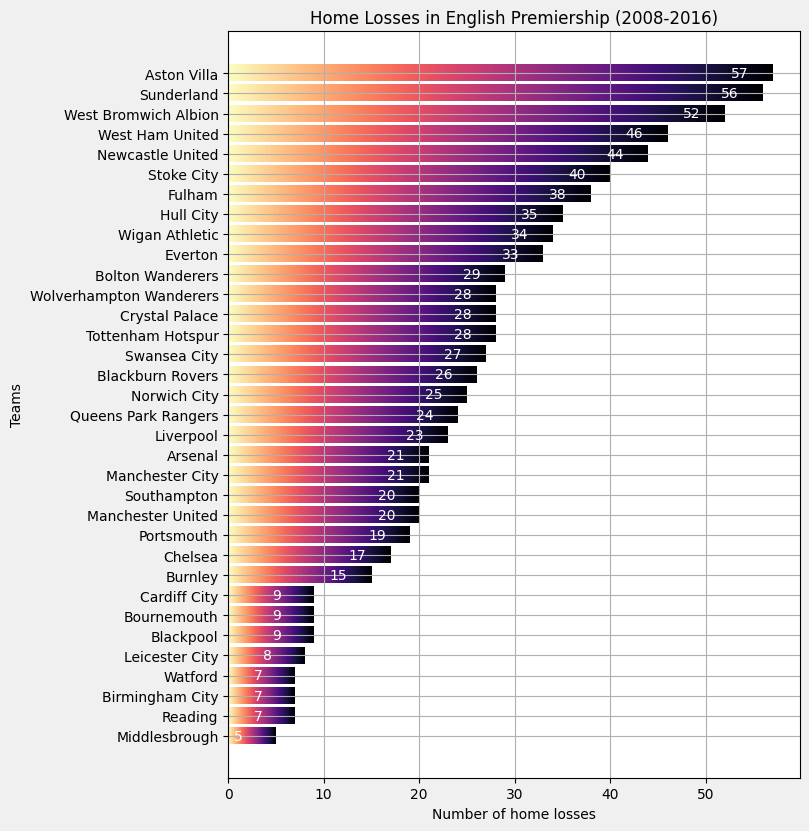

In [106]:
english_hometeam_loss_grouped.sort_values(by="home_team_loss", inplace=True)
fig, ax = plt.subplots(figsize=(8,8), facecolor=(.94, .94, .94))
mpl.pyplot.magma()
bar = ax.barh(english_hometeam_loss_grouped['home_team'], english_hometeam_loss_grouped['home_team_loss']);
plt.tight_layout()
plt.title("Home Losses in English Premiership (2008-2016)")
plt.ylabel("Teams");
plt.xlabel("Number of home losses");

ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

            
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white')            # Change label color to white
    
    

I will now look at the data for the away team wins, draws, and losses. 

In [107]:
english_matches_filtered.head()

,name,home_team,away_team,home_team_goal,away_team_goal,home_team_outcome,away_team_outcome
1728,England,Manchester United,Newcastle United,1,1,Draw,Draw
1729,England,Arsenal,West Bromwich Albion,1,0,Win,Loss
1730,England,Sunderland,Liverpool,0,1,Loss,Win
1731,England,West Ham United,Wigan Athletic,2,1,Win,Loss
1732,England,Aston Villa,Manchester City,4,2,Win,Loss


Away team wins first. 

In [108]:
english_awayteam_win = english_matches_filtered[english_matches_filtered['away_team_outcome'] == "Win"]
english_awayteam_win.head()

,name,home_team,away_team,home_team_goal,away_team_goal,home_team_outcome,away_team_outcome
1730,England,Sunderland,Liverpool,0,1,Loss,Win
1733,England,Everton,Blackburn Rovers,2,3,Loss,Win
1741,England,Bolton Wanderers,Everton,0,1,Loss,Win
1742,England,Hull City,Chelsea,0,3,Loss,Win
1755,England,Portsmouth,Wigan Athletic,1,2,Loss,Win


In [109]:
# pick only away teams cols
english_awaywin_cols = ["away_team", "away_team_outcome"]
english_awayteam_win_updated = english_awayteam_win[english_awaywin_cols]
english_awayteam_win_updated.head()

,away_team,away_team_outcome
1730,Liverpool,Win
1733,Blackburn Rovers,Win
1741,Everton,Win
1742,Chelsea,Win
1755,Wigan Athletic,Win


In [110]:
# we now do groupby since some teams win away more than once
english_awayteam_win_grouped = english_awayteam_win_updated.groupby("away_team").count()
english_awayteam_win_grouped.head()

,away_team_outcome
away_team,
Arsenal,73
Aston Villa,41
Birmingham City,7
Blackburn Rovers,13
Blackpool,5


In [111]:
# convert the series to a data frame
english_awayteam_win_grouped.reset_index(inplace=True)
# rename cols
english_awayteam_win_grouped.rename(columns={"away_team_outcome": "away_team_wins"}, inplace=True)
english_awayteam_win_grouped.head()

,away_team,away_team_wins
0,Arsenal,73
1,Aston Villa,41
2,Birmingham City,7
3,Blackburn Rovers,13
4,Blackpool,5


In [112]:
# we'll now sort the outcome
english_awayteam_win_grouped.sort_values(by="away_team_wins", ascending=False, inplace=True)
english_awayteam_win_grouped.head()

,away_team,away_team_wins
17,Manchester United,76
9,Chelsea,75
0,Arsenal,73
15,Liverpool,64
28,Tottenham Hotspur,63


It is seen that Manchester United is the team with the most away wins (76) for the period and is followed by Chelsea (75).

A visualization of the above table ensues. 

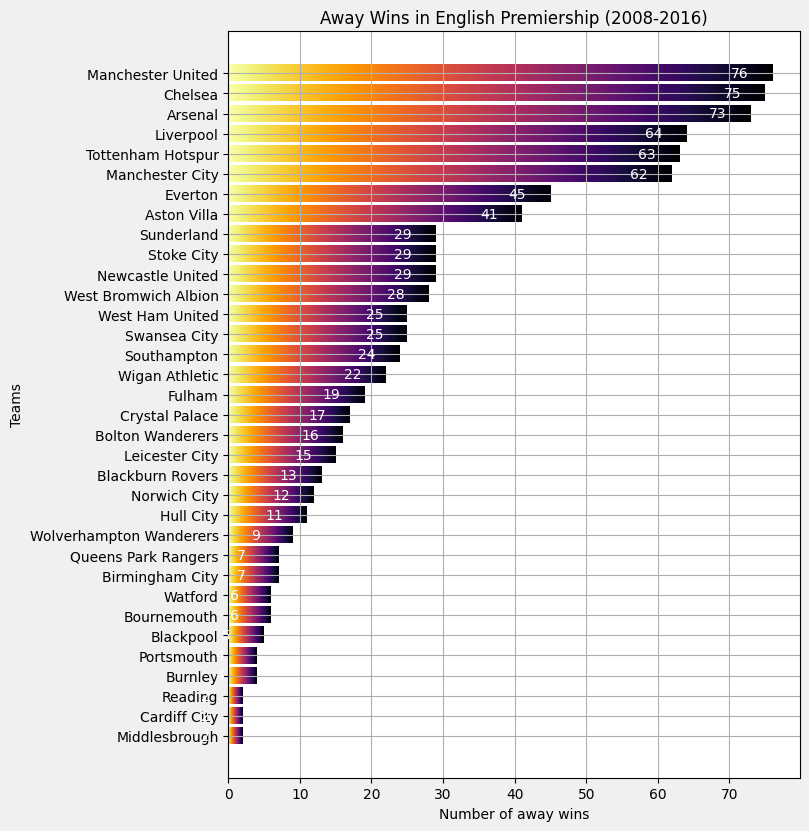

In [113]:
english_awayteam_win_grouped.sort_values(by="away_team_wins", inplace=True)
fig, ax = plt.subplots(figsize=(8,8), facecolor=(.94, .94, .94))
mpl.pyplot.inferno()
bar = ax.barh(english_awayteam_win_grouped['away_team'], english_awayteam_win_grouped['away_team_wins']);
plt.tight_layout()
plt.title("Away Wins in English Premiership (2008-2016)")
plt.ylabel("Teams");
plt.xlabel("Number of away wins");

ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

            
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white')            # Change label color to white
    
    

I will now consider away draws and look for the highest team. 

In [114]:
english_awayteam_draw = english_matches_filtered[english_matches_filtered['away_team_outcome'] == "Draw"]
english_awayteam_draw.head()

,name,home_team,away_team,home_team_goal,away_team_goal,home_team_outcome,away_team_outcome
1728,England,Manchester United,Newcastle United,1,1,Draw,Draw
1739,England,Arsenal,Tottenham Hotspur,4,4,Draw,Draw
1751,England,Middlesbrough,West Ham United,1,1,Draw,Draw
1754,England,West Bromwich Albion,Blackburn Rovers,2,2,Draw,Draw
1767,England,Wigan Athletic,Stoke City,0,0,Draw,Draw


In [115]:
# pick only away teams cols
english_awaydraw_cols = ["away_team", "away_team_outcome"]
english_awayteam_draw_updated = english_awayteam_draw[english_awaydraw_cols]
english_awayteam_draw_updated.head()

,away_team,away_team_outcome
1728,Newcastle United,Draw
1739,Tottenham Hotspur,Draw
1751,West Ham United,Draw
1754,Blackburn Rovers,Draw
1767,Stoke City,Draw


In [116]:
# we now do groupby since some teams draw away more than once
english_awayteam_draw_grouped = english_awayteam_draw_updated.groupby("away_team").count()
english_awayteam_draw_grouped.head()

,away_team_outcome
away_team,
Arsenal,39
Aston Villa,38
Birmingham City,9
Blackburn Rovers,18
Blackpool,4


In [117]:
# convert the series to a data frame
english_awayteam_draw_grouped.reset_index(inplace=True)
# rename cols
english_awayteam_draw_grouped.rename(columns={"away_team_outcome": "away_team_draws"}, inplace=True)
english_awayteam_draw_grouped.head()

,away_team,away_team_draws
0,Arsenal,39
1,Aston Villa,38
2,Birmingham City,9
3,Blackburn Rovers,18
4,Blackpool,4


In [118]:
# we'll now sort the outcome
english_awayteam_draw_grouped.sort_values(by="away_team_draws", ascending=False, inplace=True)
english_awayteam_draw_grouped.head()

,away_team,away_team_draws
11,Everton,57
26,Sunderland,45
25,Stoke City,43
16,Manchester City,43
31,West Ham United,42


Everton is the club with the highest away team draws (57), and is followed by Sunderland. 

A visual summary will do a lot of good. 

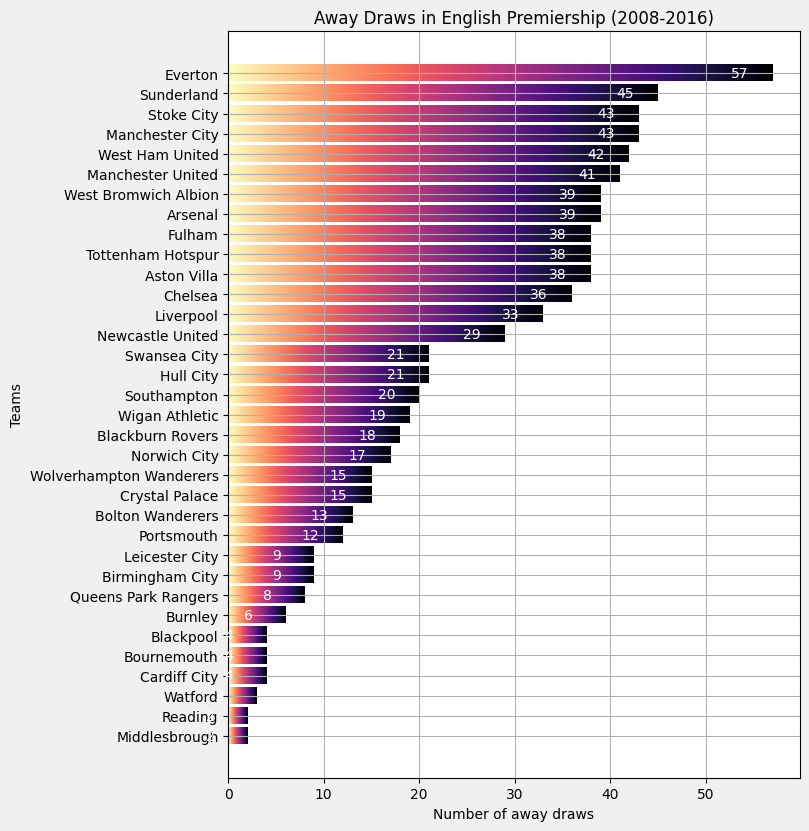

In [119]:
english_awayteam_draw_grouped.sort_values(by="away_team_draws", inplace=True)
fig, ax = plt.subplots(figsize=(8,8), facecolor=(.94, .94, .94))
mpl.pyplot.magma()
bar = ax.barh(english_awayteam_draw_grouped['away_team'], english_awayteam_draw_grouped['away_team_draws']);
plt.tight_layout()
plt.title("Away Draws in English Premiership (2008-2016)")
plt.ylabel("Teams");
plt.xlabel("Number of away draws");

ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

            
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white')            # Change label color to white
    
    

Finally, the teams with the high away losses. 

In [120]:
english_awayteam_loss = english_matches_filtered[english_matches_filtered['away_team_outcome'] == "Loss"]
english_awayteam_loss.head()

,name,home_team,away_team,home_team_goal,away_team_goal,home_team_outcome,away_team_outcome
1729,England,Arsenal,West Bromwich Albion,1,0,Win,Loss
1731,England,West Ham United,Wigan Athletic,2,1,Win,Loss
1732,England,Aston Villa,Manchester City,4,2,Win,Loss
1734,England,Middlesbrough,Tottenham Hotspur,2,1,Win,Loss
1735,England,Bolton Wanderers,Stoke City,3,1,Win,Loss


In [121]:
# pick only away teams cols
english_awayloss_cols = ["away_team", "away_team_outcome"]
english_awayteam_loss_updated = english_awayteam_loss[english_awayloss_cols]
english_awayteam_loss_updated.head()

,away_team,away_team_outcome
1729,West Bromwich Albion,Loss
1731,Wigan Athletic,Loss
1732,Manchester City,Loss
1734,Tottenham Hotspur,Loss
1735,Stoke City,Loss


In [122]:
# we now do groupby since some teams loss away more than once
english_awayteam_loss_grouped = english_awayteam_loss_updated.groupby("away_team").count()
english_awayteam_loss_grouped.head()

,away_team_outcome
away_team,
Arsenal,40
Aston Villa,73
Birmingham City,22
Blackburn Rovers,45
Blackpool,10


In [123]:
# convert the series to a data frame
english_awayteam_loss_grouped.reset_index(inplace=True)
# rename cols
english_awayteam_loss_grouped.rename(columns={"away_team_outcome": "away_team_loss"}, inplace=True)
english_awayteam_loss_grouped.head()

,away_team,away_team_loss
0,Arsenal,40
1,Aston Villa,73
2,Birmingham City,22
3,Blackburn Rovers,45
4,Blackpool,10


In [125]:
# we'll now sort the outcome
english_awayteam_loss_grouped.sort_values(by="away_team_loss", ascending=False, inplace=True)
english_awayteam_loss_grouped.head()

,away_team,away_team_loss
25,Stoke City,80
26,Sunderland,78
19,Newcastle United,75
1,Aston Villa,73
30,West Bromwich Albion,66


Stoke City (80) has the highest away loss followed by Sunderland (78).

A visual of this result now ensues. 

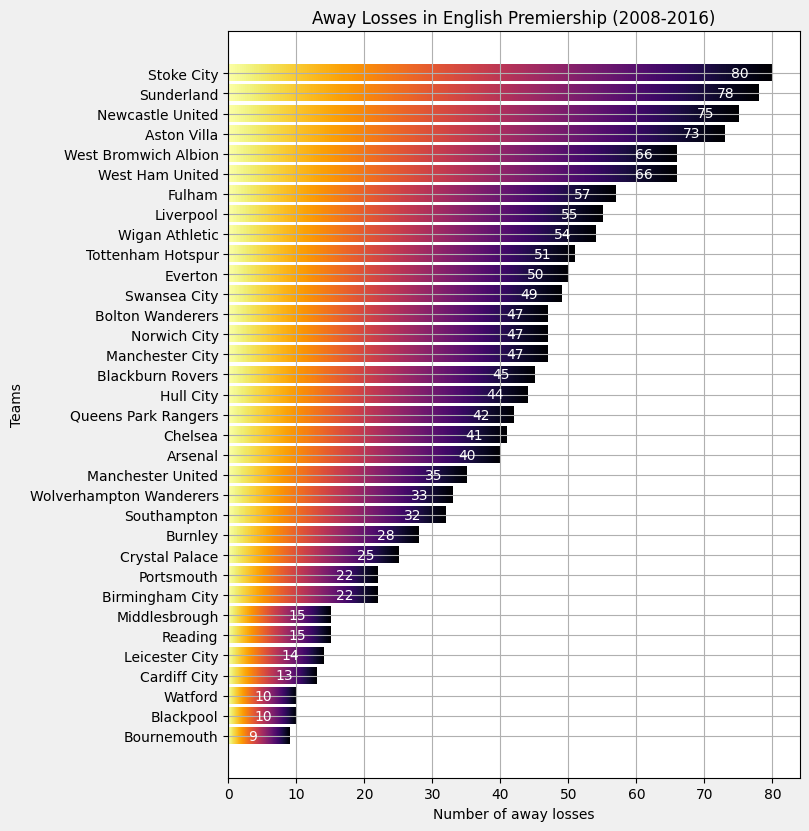

In [126]:
english_awayteam_loss_grouped.sort_values(by="away_team_loss", inplace=True)
fig, ax = plt.subplots(figsize=(8,8), facecolor=(.94, .94, .94))
mpl.pyplot.inferno()
bar = ax.barh(english_awayteam_loss_grouped['away_team'], english_awayteam_loss_grouped['away_team_loss']);
plt.tight_layout()
plt.title("Away Losses in English Premiership (2008-2016)")
plt.ylabel("Teams");
plt.xlabel("Number of away losses");

ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

            
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white')            # Change label color to white
    
    

## References

1. [How to extract tables from SQLite Database. Stackoverflow post.](https://stackoverflow.com/questions/18827028/write-to-csv-from-sqlite3-database-in-python)